# AREDS Study Participant Exploration

## AREDS Report 8 summary

### Participants
* 4757 participants enrolled
* 1117 AMD Category 1 - few if any drusen, not involved in clinical trial
* 3640 involved in Dietary Supplement clinical trial
    * 1063 AMD Category 2 - extensive small drusen, pigment abnormalities, or at least 1 intermediate size druse (GA absent)
    * 1621 AMD Category 3 - extensive intermediate drusen, GA not involving the center of the macula, or at least 1 large druse
        * 3a - Category 3 in one eye, with other eye being 1,2
        * 3b - Category 3 in one eye, but visual acuity < 20/32 due to something other than AMD
    * 956 AMD Category 4 - Advanced AMD or visual acuity less than 20/32 due to AMD in 1 eye
        * 4a - Advanced AMD in one eye, with other eye being 1,2, or 3a
        * 4b - Visual acuity less than 20/32 due to AMD, but advanced AMD not present, with other eye being 1,2, or 3a
* age categories: 55-59, 60-64, 65-69, 70-74, 75-80

### Treatments
* Placebo - 31% participants
* Antioxidants - 31% (vitamin C, 500 mg; vitamin E, 400 IU; and beta carotene, 15 mg)
* Zinc - 19% (zinc, 80 mg, as zinc oxide and copper, 2 mg, as cupric oxide)
* Antioxidants + zinc - 19%

### Treatment results
1. Antiox + zinc - odds reduction of development of AMD = 0.52-0.98, 99% CI
2. Zinc alone - 0.55-1.03, 99% CI
3. Antiox alone - 0.59-1.09, 99% CI

### Outcome by category
* AMD category 1: only 5 AMD events after 5 years.
* AMD Category 2 participants 5-year probability of progression to Advanced AMD: 1.3% (Only 15 AMD events)
* AMD Category 3 participants 5-year probability of progression to Advanced AMD: 18%
* Within category 3, Large drusen in each eye or non-central GA in 1 eye: 5-year progression rate : 27%

## AREDS Report 17 summary
* Published 2005
* Only done on right eyes, 1225 eyes
* Photographs at baseline, 2years, and anually thereafter
* Graded for drusen characteristics (size, type, area), pigmentary abnormalities (increased pigment, depigmentation, geographic atrophy), and neovascular AMD ( retinal pigment epithelial detachment, subretinal fibrous tissue , etc)
* Advanced AMD = 1 or more neoovascular abnormalities, photocoagulation for AMD, geographic atrophy involving center of macula
* Geographic atrophy = Retinal Pigment epithelial (RPE), roughly round or oval shape, sharp margins and visibility of underlying large choroidal vessels.

### Proposed severity scale

* Table 1, 9-step scale combines drusen scale with 5-step pigmentary scale
* Table 8, definition of scale steps?
* step 1 risk of AMD = 1%
* step 9 risk of AMD ~50%
* Uses Cohen's Kappa coefficient ([wiki](https://en.wikipedia.org/wiki/Cohen%27s_kappa), [scikit-learn implementation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html)), for evaluating model reproducibility
* Table 12, Intergrader Reproducibility: Complete agreement 63.4%, within 1 step 86.6%, 2 steps 93.6%, $\kappa$ (SE) = 0.58 (0.015), $\kappa$ (SE) weighted 0.75 for 1 off diagonal = 0.73 (0.013)
* 12-scale severity score = 9 scale step, plus 3 outcomes

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load <code>data_pool_all.tsv</code>

In [2]:
pool = pd.read_csv('data_pool_all.tsv', sep='\t')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
len(pool)

133915

In [4]:
len(pool.DB_ID.unique())

4596

In [5]:
pool['converted_file_name'] = [ _.split('/')[-1] for _ in list(pool.Path) ]

In [6]:
pool.head()

,ID,DB_ID,Visit,EyeLR,SideLR,Path,BaseCat,ProgressCat,SevScore,SimpleSev,converted_file_name
0,1890,51003,4,LE,LS,tiff/AMD_Category_2_Other/51003-04-F2-LE-LS.tiff,2,Other,2.0,1.0,51003-04-F2-LE-LS.tiff
1,1890,51003,4,LE,RS,tiff/AMD_Category_2_Other/51003-04-F2-LE-RS.tiff,2,Other,2.0,1.0,51003-04-F2-LE-RS.tiff
2,1890,51003,4,RE,LS,tiff/AMD_Category_2_Other/51003-04-F2-RE-LS.tiff,2,Other,2.0,1.0,51003-04-F2-RE-LS.tiff
3,1890,51003,4,RE,RS,tiff/AMD_Category_2_Other/51003-04-F2-RE-RS.tiff,2,Other,2.0,1.0,51003-04-F2-RE-RS.tiff
4,1890,51003,6,LE,LS,tiff/AMD_Category_2_Other/51003-06-F2-LE-LS.tiff,2,Other,2.0,1.0,51003-06-F2-LE-LS.tiff


# Load <code>AREDS_2014_Image_File_List_CLEANED.csv</code>

In [7]:
categories = pd.read_csv('AREDS_2014_Image_File_List_CLEANED.csv')

In [8]:
len(categories)

134519

In [9]:
categories.head()

,Baseline_AMD_Category,Final_AMD_Phenotype_Group,Final_AMD_Phenotype,converted_file_name
0,2,other,Large Drusen Questionable 1,51003-04-F2-LE-LS.tiff
1,2,other,Large Drusen Questionable 1,51003-04-F2-LE-RS.tiff
2,2,other,Large Drusen Questionable 1,51003-04-F2-RE-LS.tiff
3,2,other,Large Drusen Questionable 1,51003-04-F2-RE-RS.tiff
4,2,other,Large Drusen Questionable 1,51003-06-F2-LE-LS.tiff


# Load <code>20170502_AREDS_data_Freekje.csv</code>

In [10]:
freekje = pd.read_csv('20170502_AREDS_data_Freekje_orig.csv')

In [11]:
len(freekje)

134519

In [12]:
freekje.head()

,Patid,Areds_subject_id,Image_file_nameimg_file,AMD_CATcategory,Case_controlcase_control,Amd_statusstatus,Cataract,VisNovis_year,Treatment,age_baseline,male,white
0,51003,1890,51003 04 F2 LE LS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
1,51003,1890,51003 04 F2 LE RS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
2,51003,1890,51003 04 F2 RE LS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
3,51003,1890,51003 04 F2 RE RS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
4,51003,1890,51003 06 F2 LE LS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 3,Placebo,72.484932,0,1


# Compare files

## Baseline AMD category

In [13]:
freekje['AMD_CATcategory'].value_counts()

Baseline AMD Category 3a    42106
Baseline AMD Category 2     32247
Baseline AMD Category 1     32035
Baseline AMD Category 4a    20186
Baseline AMD Category 3b     4237
Baseline AMD Category 4b     3708
Name: AMD_CATcategory, dtype: int64

In [14]:
categories['Baseline_AMD_Category'].value_counts()

3a    42106
2     32247
1     32035
4a    20186
3b     4237
4b     3708
Name: Baseline_AMD_Category, dtype: int64

## Final_AMD_Phenotype_Group

In [15]:
freekje['Case_controlcase_control'].value_counts()

Final AMD Phenotype Group: Other (Not Advanced AMD or Control)    77328
Final AMD Phenotype Group: Case (Advanced AMD)                    36072
Final AMD Phenotype Group: Control                                21119
Name: Case_controlcase_control, dtype: int64

In [16]:
categories['Final_AMD_Phenotype_Group'].value_counts()

other      77328
case       36072
control    21119
Name: Final_AMD_Phenotype_Group, dtype: int64

## Final_AMD_Phenotype

In [17]:
freekje['Amd_statusstatus'].value_counts()

Final AMD Phenotype: Other non-control phenotype    28433
Final AMD Phenotype: Large Drusen                   26271
Final AMD Phenotype: NV AMD                         22179
Final AMD Phenotype: GA (Geographic Atrophy)         8733
Final AMD Phenotype: Large Drusen Questionable 1     8585
Final AMD Phenotype: Control                         7793
Final AMD Phenotype: Control Questionable 3          6386
Final AMD Phenotype: Questionable AMD                6178
Final AMD Phenotype: Large Drusen Questionable 3     5367
Final AMD Phenotype: Both NV AMD and GA              5160
Final AMD Phenotype: Control Questionable 1          4349
Final AMD Phenotype: Large Drusen Questionable 2     2494
Final AMD Phenotype: Control Questionable 4          1619
Final AMD Phenotype: Control Questionable 2           972
Name: Amd_statusstatus, dtype: int64

In [18]:
categories['Final_AMD_Phenotype'].value_counts()

Other non-control phenotype    28433
Large Drusen                   26271
NV AMD                         22179
GA (Geographic Atrophy)         8733
Large Drusen Questionable 1     8585
Control                         7793
Control Questionable 3          6386
Questionable AMD                6178
Large Drusen Questionable 3     5367
Both NV AMD and GA              5160
Control Questionable 1          4349
Large Drusen Questionable 2     2494
Control Questionable 4          1619
Control Questionable 2           972
Name: Final_AMD_Phenotype, dtype: int64

# New categories
## Cataract

In [19]:
freekje['Cataract'].value_counts()

Final Cataract Phenotype: Absent                               38748
Final Cataract Phenotype: Cortical alone                       25774
Final Cataract Phenotype: Nuclear alone                        22692
Final Cataract Phenotype: Questionable                         11611
Final Cataract Phenotype: Cataract Surgery/No specific type    11467
Final Cataract Phenotype: Nuclear/Cortical                      7632
Final Cataract Phenotype: Cortical/PSC                          4652
Final Cataract Phenotype: Nuclear/PSC                           4370
Final Cataract Phenotype: PSC alone                             4086
Final Cataract Phenotype: Nuclear/Cortical/PSC                  3487
Name: Cataract, dtype: int64

## Treatment

In [20]:
freekje['Treatment'].value_counts()

Placebo    41751
Antiox     41748
Ax+Zinc    25545
Zinc       25475
Name: Treatment, dtype: int64

In [328]:
merged.Treatment.value_counts() / merged.Treatment.count()

Antiox     0.310458
Placebo    0.309968
Zinc       0.190496
Ax+Zinc    0.189078
Name: Treatment, dtype: float64

## age baseline

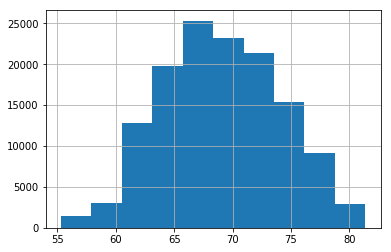

In [21]:
freekje['age_baseline'].hist()

## Male

In [22]:
freekje['male'].value_counts()

0    76391
1    58128
Name: male, dtype: int64

In [23]:
freekje['white'].value_counts()

1    129111
0      5408
Name: white, dtype: int64

In [24]:
freekje['VisNovis_year'].value_counts()

Study Visit: QUA          15933
Study Visit: Year 3       15883
Study Visit: Year 5       14488
Study Visit: Year 2       14443
Study Visit: Year 4       13159
Study Visit: Year 7       10953
Study Visit: Year 6       10614
Study Visit: Year 9        9668
Study Visit: Year 8        7774
Study Visit: Year 10       7685
Study Visit: Year 11       5629
Study Visit: Year 12       2135
Study Visit: Year 6.5       992
Study Visit: Year 5.5       880
Study Visit: Year 7.5       878
Study Visit: Year 1         832
Study Visit: Year 2.5       512
Study Visit: Year 3.5       506
Study Visit: Year 0.5       447
Study Visit: Year 1.5       446
Study Visit: Year 4.5       346
Study Visit: Year 8.5       242
Study Visit: Baseline        28
Study Visit: Year 13         22
Study Visit: Year 9.5        20
Study Visit: Year 10.5        4
Name: VisNovis_year, dtype: int64

# Reformat and save

In [25]:
freekje.columns

Index(['Patid', 'Areds_subject_id', 'Image_file_nameimg_file',
       'AMD_CATcategory', 'Case_controlcase_control', 'Amd_statusstatus',
       'Cataract', 'VisNovis_year', 'Treatment', 'age_baseline', 'male',
       'white'],
      dtype='object')

In [26]:
new_columns = ['Patid', 'Areds_subject_id', 'converted_file_name', 'Baseline_AMD_Category', 
        'Final_AMD_Phenotype_Group', 'Final_AMD_Phenotype', 'Final_Cataract_Phenotype', "Study_Visit_Year",
               'Treatment', 'age_baseline', 'male', 'white']

In [27]:
list( zip( list(freekje.columns), new_columns ))

[('Patid', 'Patid'),
 ('Areds_subject_id', 'Areds_subject_id'),
 ('Image_file_nameimg_file', 'converted_file_name'),
 ('AMD_CATcategory', 'Baseline_AMD_Category'),
 ('Case_controlcase_control', 'Final_AMD_Phenotype_Group'),
 ('Amd_statusstatus', 'Final_AMD_Phenotype'),
 ('Cataract', 'Final_Cataract_Phenotype'),
 ('VisNovis_year', 'Study_Visit_Year'),
 ('Treatment', 'Treatment'),
 ('age_baseline', 'age_baseline'),
 ('male', 'male'),
 ('white', 'white')]

In [28]:
freekje.columns = new_columns

In [29]:
freekje.head()

,Patid,Areds_subject_id,converted_file_name,Baseline_AMD_Category,Final_AMD_Phenotype_Group,Final_AMD_Phenotype,Final_Cataract_Phenotype,Study_Visit_Year,Treatment,age_baseline,male,white
0,51003,1890,51003 04 F2 LE LS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
1,51003,1890,51003 04 F2 LE RS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
2,51003,1890,51003 04 F2 RE LS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
3,51003,1890,51003 04 F2 RE RS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 2,Placebo,72.484932,0,1
4,51003,1890,51003 06 F2 LE LS.jpg,Baseline AMD Category 2,Final AMD Phenotype Group: Other (Not Advanced...,Final AMD Phenotype: Large Drusen Questionable 1,Final Cataract Phenotype: Nuclear/Cortical,Study Visit: Year 3,Placebo,72.484932,0,1


In [30]:
freekje['converted_file_name'] = \
    [ (_[:-3]+'tiff').replace(' ', '-') for _ in list(freekje['converted_file_name']) ]

In [31]:
freekje['Baseline_AMD_Category'] = \
    [ _.split()[-1] for _ in list(freekje['Baseline_AMD_Category']) ]

In [32]:
freekje['Final_AMD_Phenotype_Group'] = \
    [ _.split(':')[-1].strip() for _ in list( freekje['Final_AMD_Phenotype_Group']) ]

In [33]:
freekje['Final_AMD_Phenotype_Group'] = \
    [ _ if _ != 'Other (Not Advanced AMD or Control)' else 'Other' for _ in list(freekje['Final_AMD_Phenotype_Group'] ) ]

In [34]:
freekje['Final_AMD_Phenotype_Group'] = \
    [ _ if _ != 'Case (Advanced AMD)' else 'Case' for _ in list(freekje['Final_AMD_Phenotype_Group'] ) ]

In [35]:
freekje['Final_AMD_Phenotype'] = \
    [ _.split(':')[-1].strip() for _ in list( freekje['Final_AMD_Phenotype']) ]

In [36]:
freekje['Final_Cataract_Phenotype'] = \
    [ _.split(':')[-1].strip() for _ in list( freekje['Final_Cataract_Phenotype']) ]

In [37]:
freekje['Study_Visit_Year'] = \
    [ _.split()[-1] for _ in list(freekje['Study_Visit_Year']) ]

In [38]:
freekje.head()

,Patid,Areds_subject_id,converted_file_name,Baseline_AMD_Category,Final_AMD_Phenotype_Group,Final_AMD_Phenotype,Final_Cataract_Phenotype,Study_Visit_Year,Treatment,age_baseline,male,white
0,51003,1890,51003-04-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1
1,51003,1890,51003-04-F2-LE-RS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1
2,51003,1890,51003-04-F2-RE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1
3,51003,1890,51003-04-F2-RE-RS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1
4,51003,1890,51003-06-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,3,Placebo,72.484932,0,1


# Clean data pool

In [39]:
pool.head()

,ID,DB_ID,Visit,EyeLR,SideLR,Path,BaseCat,ProgressCat,SevScore,SimpleSev,converted_file_name
0,1890,51003,4,LE,LS,tiff/AMD_Category_2_Other/51003-04-F2-LE-LS.tiff,2,Other,2.0,1.0,51003-04-F2-LE-LS.tiff
1,1890,51003,4,LE,RS,tiff/AMD_Category_2_Other/51003-04-F2-LE-RS.tiff,2,Other,2.0,1.0,51003-04-F2-LE-RS.tiff
2,1890,51003,4,RE,LS,tiff/AMD_Category_2_Other/51003-04-F2-RE-LS.tiff,2,Other,2.0,1.0,51003-04-F2-RE-LS.tiff
3,1890,51003,4,RE,RS,tiff/AMD_Category_2_Other/51003-04-F2-RE-RS.tiff,2,Other,2.0,1.0,51003-04-F2-RE-RS.tiff
4,1890,51003,6,LE,LS,tiff/AMD_Category_2_Other/51003-06-F2-LE-LS.tiff,2,Other,2.0,1.0,51003-06-F2-LE-LS.tiff


In [40]:
pool.EyeLR.value_counts()

LE     67007
RE     66862
lE        27
2 L        5
2 R        5
R          4
rE         2
le         2
L          1
Name: EyeLR, dtype: int64

In [41]:
pool.loc[ pool.EyeLR=='lE', ['EyeLR']] = 'LE'
pool.loc[ pool.EyeLR=='rE', ['EyeLR']] = 'RE'
pool.loc[ pool.EyeLR=='2 R', ['EyeLR']] = 'RE'
pool.loc[ pool.EyeLR=='2 L', ['EyeLR']] = 'LE'
pool.loc[ pool.EyeLR=='R', ['EyeLR']] = 'RE'
pool.loc[ pool.EyeLR=='le', ['EyeLR']] = 'LE'
pool.loc[ pool.EyeLR=='L', ['EyeLR']] = 'LE'

In [42]:
pool.EyeLR.value_counts()

LE    67042
RE    66873
Name: EyeLR, dtype: int64

In [43]:
 pool.SideLR.value_counts()

LS     67124
RS     66714
rS        31
ls        17
lS        13
E R        9
E L        6
rs         1
Name: SideLR, dtype: int64

In [44]:
pool.loc[ pool.SideLR=='rS', ['SideLR']] = 'RS'
pool.loc[ pool.SideLR=='ls', ['SideLR']] = 'LS'
pool.loc[ pool.SideLR=='lS', ['SideLR']] = 'LS'
pool.loc[ pool.SideLR=='ls', ['SideLR']] = 'LS'
pool.loc[ pool.SideLR=='E R', ['SideLR']] = 'RS'
pool.loc[ pool.SideLR=='E L', ['SideLR']] = 'LS'
pool.loc[ pool.SideLR=='rs', ['SideLR']] = 'RS'

In [45]:
pool.SideLR.value_counts()

LS    67160
RS    66755
Name: SideLR, dtype: int64

## No severity score? You're out!

In [46]:
pool.SevScore.count()

133637

In [47]:
pool.SevScore.isnull().index

RangeIndex(start=0, stop=133915, step=1)

In [48]:
len( pool[ pool.SevScore.isnull() ].index )

278

In [49]:
pool.drop( pool[ pool.SevScore.isnull() ].index, inplace=True )

## No matching left and right side? You're out!

In [50]:
weird_indices = []
for _id, df in iter(pool.groupby( ['DB_ID', 'Visit', 'EyeLR'] )):
    if len(df) != 2:
        weird_indices.extend( list(df.index))

In [51]:
len(weird_indices)

1011

In [52]:
pool.drop( weird_indices, inplace=True )

# Merge

In [53]:
pool.drop( ['ID', 'DB_ID', 'Path', 'BaseCat', 'ProgressCat'], axis=1, inplace=True )

In [54]:
merged = freekje.merge( pool, how='inner', on='converted_file_name' )

In [55]:
merged.head()

,Patid,Areds_subject_id,converted_file_name,Baseline_AMD_Category,Final_AMD_Phenotype_Group,Final_AMD_Phenotype,Final_Cataract_Phenotype,Study_Visit_Year,Treatment,age_baseline,male,white,Visit,EyeLR,SideLR,SevScore,SimpleSev
0,51003,1890,51003-04-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1,4,LE,LS,2.0,1.0
1,51003,1890,51003-04-F2-LE-RS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1,4,LE,RS,2.0,1.0
2,51003,1890,51003-04-F2-RE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1,4,RE,LS,2.0,1.0
3,51003,1890,51003-04-F2-RE-RS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,2,Placebo,72.484932,0,1,4,RE,RS,2.0,1.0
4,51003,1890,51003-06-F2-LE-LS.tiff,2,Other,Large Drusen Questionable 1,Nuclear/Cortical,3,Placebo,72.484932,0,1,6,LE,LS,2.0,1.0


In [56]:
print( len( pool ) )
print( len( freekje ) )
print( len( merged ) )

132626
134519
132617


# Write to file

In [ ]:
merged.to_csv('20170830_AREDS_DB.csv')

# Pivot Tables

In [57]:
pd.pivot_table( merged, values='Patid', index='Baseline_AMD_Category', columns='Final_AMD_Phenotype_Group', aggfunc='count')

Final_AMD_Phenotype_Group,Case,Control,Other
Baseline_AMD_Category,,,
1,24.0,16446.0,15204.0
2,524.0,4368.0,26991.0
3a,11692.0,NaN,29765.0
3b,1634.0,NaN,2458.0
4a,19209.0,NaN,666.0
4b,2470.0,8.0,1158.0


In [58]:
pd.pivot_table( merged, values='Patid', index='Baseline_AMD_Category', columns='SimpleSev', aggfunc='count')

SimpleSev,0.0,1.0,2.0,3.0,4.0,5.0
Baseline_AMD_Category,,,,,,
1,27642,3116,596,140,12,8
2,16413,10548,3342,1162,264,34
3a,2194,8757,9562,8834,10420,1526
3b,36,460,948,1078,1260,234
4a,28,48,3410,4352,5919,6008
4b,20,150,566,836,1384,654


In [59]:
pd.pivot_table( merged, values='Patid', index='Baseline_AMD_Category', columns='SevScore', aggfunc='count')

SevScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Baseline_AMD_Category,,,,,,,,,,,,
1,27716.0,2624.0,438.0,584.0,124.0,94.0,20.0,54.0,4.0,NaN,16.0,NaN
2,15382.0,8059.0,2578.0,3677.0,956.0,527.0,202.0,330.0,38.0,2.0,126.0,6.0
3a,4046.0,3548.0,2921.0,5755.0,4799.0,6280.0,5472.0,4172.0,1208.0,812.0,2230.0,214.0
3b,136.0,226.0,182.0,482.0,456.0,782.0,588.0,510.0,164.0,120.0,398.0,48.0
4a,916.0,627.0,328.0,842.0,746.0,1023.0,1054.0,1018.0,606.0,1366.0,10715.0,634.0
4b,104.0,148.0,66.0,322.0,262.0,368.0,500.0,590.0,250.0,494.0,450.0,82.0


In [62]:
pd.pivot_table( merged, values='Patid', index='Final_Cataract_Phenotype', columns='Baseline_AMD_Category', aggfunc='count')

Baseline_AMD_Category,1,2,3a,3b,4a,4b
Final_Cataract_Phenotype,,,,,,
Absent,10670,9720,11386,950,4714,788
Cataract Surgery/No specific type,1698,1994,4484,520,2030,432
Cortical alone,5644,6575,8352,600,3628,694
Cortical/PSC,1232,1076,1210,188,890,8
Nuclear alone,4902,5164,7235,806,3692,570
Nuclear/Cortical,1560,1490,2796,308,1176,206
Nuclear/Cortical/PSC,1016,568,942,130,638,164
Nuclear/PSC,528,1200,1092,306,1034,160
PSC alone,846,1210,998,100,667,202


In [63]:
pd.pivot_table( merged, values='Patid', index='Final_AMD_Phenotype', columns='Baseline_AMD_Category', aggfunc='count')

Baseline_AMD_Category,1,2,3a,3b,4a,4b
Final_AMD_Phenotype,,,,,,
Both NV AMD and GA,NaN,52.0,1634.0,126.0,2773.0,520.0
Control,7640.0,NaN,NaN,NaN,NaN,NaN
Control Questionable 1,3420.0,896.0,NaN,NaN,NaN,8.0
Control Questionable 2,712.0,256.0,NaN,NaN,NaN,NaN
Control Questionable 3,3070.0,3216.0,NaN,NaN,NaN,NaN
Control Questionable 4,1604.0,NaN,NaN,NaN,NaN,NaN
GA (Geographic Atrophy),NaN,240.0,4940.0,660.0,1438.0,1206.0
Large Drusen,868.0,4620.0,18286.0,1392.0,NaN,604.0
Large Drusen Questionable 1,474.0,2468.0,4958.0,384.0,NaN,132.0


In [64]:
pd.pivot_table( merged, values='Patid', index='Final_AMD_Phenotype', columns='SevScore', aggfunc='count')

SevScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Final_AMD_Phenotype,,,,,,,,,,,,
Both NV AMD and GA,4.0,12.0,4.0,50.0,156.0,252.0,664.0,534.0,510.0,714.0,1925.0,280.0
Control,7584.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Control Questionable 1,4142.0,156.0,16.0,8.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Control Questionable 2,906.0,58.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Control Questionable 3,5406.0,768.0,56.0,52.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Control Questionable 4,1552.0,40.0,4.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GA (Geographic Atrophy),150.0,108.0,68.0,408.0,470.0,884.0,1622.0,1572.0,1252.0,1706.0,162.0,82.0
Large Drusen,3233.0,3080.0,2530.0,4519.0,3481.0,4153.0,2694.0,2016.0,60.0,2.0,2.0,NaN
Large Drusen Questionable 1,2176.0,1724.0,984.0,1768.0,846.0,530.0,132.0,242.0,14.0,NaN,NaN,NaN


# Severity Score strongly correlates with age

In [65]:
merged.columns

Index(['Patid', 'Areds_subject_id', 'converted_file_name',
       'Baseline_AMD_Category', 'Final_AMD_Phenotype_Group',
       'Final_AMD_Phenotype', 'Final_Cataract_Phenotype', 'Study_Visit_Year',
       'Treatment', 'age_baseline', 'male', 'white', 'Visit', 'EyeLR',
       'SideLR', 'SevScore', 'SimpleSev'],
      dtype='object')

In [66]:
merged.Study_Visit_Year = [ float(_) if _ != 'QUA' else 0.0 for _ in merged.Study_Visit_Year ]

In [67]:
merged['age'] = merged.Study_Visit_Year + merged.age_baseline.astype(float)

In [68]:
import statsmodels.formula.api as smf

In [69]:
# USE LOWER-CASE ols for formula API
model = smf.ols(formula='age ~ SevScore', data=merged)

In [70]:
res = model.fit()

In [71]:
print( res.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     7588.
Date:                Wed, 30 Aug 2017   Prob (F-statistic):               0.00
Time:                        15:55:14   Log-Likelihood:            -4.1553e+05
No. Observations:              132617   AIC:                         8.311e+05
Df Residuals:                  132615   BIC:                         8.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.5063      0.024   3039.136      0.0

In [72]:
import seaborn as sns

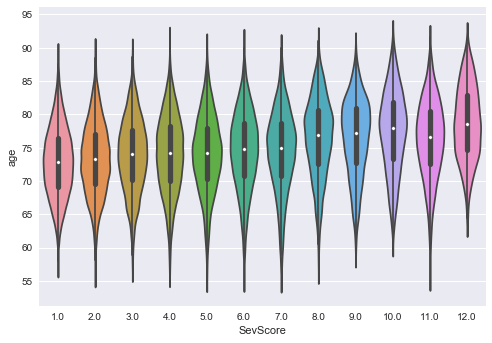

In [73]:
sns.violinplot( 'SevScore','age', data=merged )

# Create subject-to-phenotype dict

In [264]:
len (sorted( list( set( zip( list( merged.Patid ), list( merged.Final_AMD_Phenotype_Group ) ) ) ) ) )

4540

In [265]:
len( merged.Patid.unique() )

4540

In [266]:
phenotype_dict = dict( set( zip( list( merged.Patid ), list( merged.Final_AMD_Phenotype_Group ) ) ) )

# Identify Pure Control Dataset

Criteria
* Baseline AMD category == 1
* Final AMD Phenotype == Control
* Final_Cataract_Phenotype == Absent
* Treatment = Placebo

In [94]:
control_p = merged.loc[ (merged.Baseline_AMD_Category == '1') & 
                        (merged.Final_AMD_Phenotype == 'Control') &
                        (merged.Final_Cataract_Phenotype == 'Absent') & 
                        (merged.Treatment == 'Placebo') ]

In [226]:
# Check to make sure QUA coressponds with Visit 0
# control_p.loc[ [ 'QUA' in _ for _ in list( control_p[ 'converted_file_name' ] ) ] ]

In [96]:
pd.pivot_table( control_p, index='EyeLR', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0
EyeLR,,
LE,552,2
RE,552,4


In [97]:
control_t = merged.loc[ (merged.Baseline_AMD_Category == '1') & 
                        (merged.Final_AMD_Phenotype == 'Control') &
                        (merged.Final_Cataract_Phenotype == 'Absent') & 
                        (merged.Treatment == 'Antiox') ]

In [98]:
pd.pivot_table( control_t, index='EyeLR', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0
EyeLR,,
LE,752,6
RE,744,12


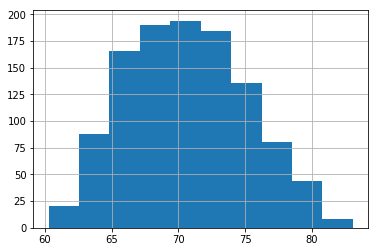

In [99]:
control_p.age.hist()

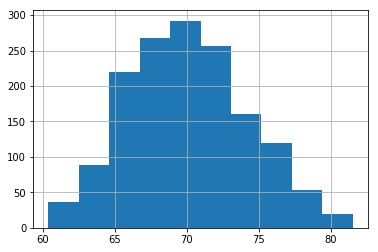

In [100]:
control_t.age.hist()

In [107]:
print(control_p.age.mean(), control_p.age.std(), control_t.age.mean(), control_t.age.std())

70.6790966309 4.42373265993 70.0690468866 4.10732143624


In [126]:
control_p_l = control_p.loc[ control_p.EyeLR == 'LE']
control_p_l = control_p_l.loc[control_p_l.SideLR == 'LS'].pivot( index='Patid', columns='Visit', values='SevScore')
control_p_l = control_p_l.loc[ control_p_l.count(axis=1) > 2 ]

In [127]:
len( control_p_l )

44

In [205]:
control_p_l.count().sum()

254

In [128]:
control_p_r = control_p.loc[ control_p.EyeLR == 'RE']
control_p_r = control_p_r.loc[control_p_r.SideLR == 'RS'].pivot( index='Patid', columns='Visit', values='SevScore')
control_p_r = control_p_r.loc[ control_p_r.count(axis=1) > 2 ]

In [129]:
len( control_p_r )

44

In [206]:
control_p_r.count().sum()

255

In [ ]:
list( zip( list( control_p_l.index), list( control_p_r.index) ) )

In [132]:
control_t_l = control_t.loc[ control_t.EyeLR == 'LE']
control_t_l = control_t_l.loc[control_t_l.SideLR == 'LS'].pivot( index='Patid', columns='Visit', values='SevScore')
control_t_l = control_t_l.loc[ control_t_l.count(axis=1) > 2 ]

In [133]:
len( control_t_l )

61

In [207]:
control_t_l.count().sum()

343

In [134]:
control_t_r = control_t.loc[ control_t.EyeLR == 'RE']
control_t_r = control_t_r.loc[control_t_r.SideLR == 'RS'].pivot( index='Patid', columns='Visit', values='SevScore')
control_t_r = control_t_r.loc[ control_t_r.count(axis=1) > 2 ]

In [135]:
len( control_t_r )

61

In [208]:
control_t_r.count().sum()

342

In [214]:
control_t_r.iloc[0].dropna().index

Int64Index([0, 4, 6, 8, 10], dtype='int64', name='Visit')

# Case

## Eliminate age as a confounding variable by using the Matching technique

In [313]:
case_p = merged.loc[ (merged.Baseline_AMD_Category == '1') 
                   & (merged.Final_AMD_Phenotype_Group != 'Control') 
                   #& (merged.Final_Cataract_Phenotype == 'Absent')
                   & (merged.Treatment == 'Placebo') ]

In [314]:
case_p.Final_AMD_Phenotype_Group.value_counts()

Other    7722
Case       12
Name: Final_AMD_Phenotype_Group, dtype: int64

In [315]:
pd.pivot_table( case_p, index='EyeLR', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
EyeLR,,,,,,,,,
LE,3000,532,104,128,36,34,6,14,6
RE,3058,486,106,140,32,30,10,8,4


In [317]:
case_t = merged.loc[ (merged.Baseline_AMD_Category == '1') 
                   & (merged.Final_AMD_Phenotype_Group != 'Control') 
                   #& (merged.Final_Cataract_Phenotype == 'Absent')
                   & (merged.Treatment == 'Antiox') ]

In [318]:
case_t.Final_AMD_Phenotype_Group.value_counts()

Other    7482
Case       12
Name: Final_AMD_Phenotype_Group, dtype: int64

In [319]:
pd.pivot_table( case_t, index='EyeLR', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0
EyeLR,,,,,,,,,,
LE,2944.0,522.0,94.0,140.0,22.0,6.0,2.0,16.0,2.0,NaN
RE,2836.0,584.0,104.0,144.0,32.0,24.0,2.0,14.0,NaN,6.0


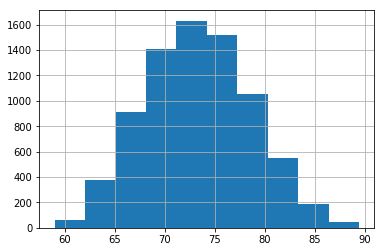

In [320]:
case_p.age.hist()

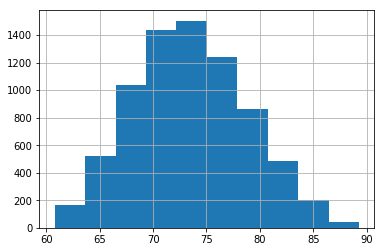

In [321]:
case_t.age.hist()

In [322]:
print(case_p.age.mean(), case_p.age.std(), case_t.age.mean(), case_t.age.std())

73.3239210602 5.30436588798 73.5009114141 5.28344571443


In [323]:
case_p_l = case_p.loc[ case_p.EyeLR == 'LE']
case_p_l = case_p_l.loc[case_p_l.SideLR == 'LS'].pivot( index='Patid', columns='Visit', values='SevScore')
case_p_l = case_p_l.loc[ case_p_l.count(axis=1) > 2 ]
case_p_l = case_p_l.loc[ case_p_l.max(axis=1) >= 5 ]

In [324]:
len(case_p_l)

24

In [325]:
case_p_l.count().sum()

231

In [252]:
case_p_r = case_p.loc[ case_p.EyeLR == 'RE']
case_p_r = case_p_r.loc[case_p_r.SideLR == 'RS'].pivot( index='Patid', columns='Visit', values='SevScore')
case_p_r = case_p_r.loc[ case_p_r.count(axis=1) > 2 ]
case_p_r = case_p_r.loc[ case_p_r.max(axis=1) >= 5 ]

In [253]:
len(case_p_r)

16

In [254]:
case_p_r.count().sum()

151

In [255]:
case_t_l = case_t.loc[ case_t.EyeLR == 'LE']
case_t_l = case_t_l.loc[case_t_l.SideLR == 'LS'].pivot( index='Patid', columns='Visit', values='SevScore')
case_t_l = case_t_l.loc[ case_t_l.count(axis=1) > 2 ]
case_t_l = case_t_l.loc[ case_t_l.max(axis=1) >= 5 ]

In [256]:
len(case_t_l)

17

In [257]:
case_t_l.count().sum()

177

In [258]:
case_t_r = case_t.loc[ case_t.EyeLR == 'RE']
case_t_r = case_t_r.loc[case_t_r.SideLR == 'RS'].pivot( index='Patid', columns='Visit', values='SevScore')
case_t_r = case_t_r.loc[ case_t_r.count(axis=1) > 2 ]
case_t_r = case_t_r.loc[ case_t_r.max(axis=1) >= 5 ]

In [259]:
len(case_t_r)

25

In [260]:
case_t_r.count().sum()

235

# Create image lists from pivoted SevScore trajectory dataframes

In [299]:
def WriteImgList( df, _class, baseline_cat=1, eye='LE' ):
    frmt = '/data/areds/44770/AREDS/AREDS_2014/tiff/AMD_Category_{}_{}/{}-{}-F2-{}-{}.tiff {}\n'
    #print( df.count().sum() )
    outfile = "20170831_{}_file_list.txt".format( _class )
    f = open( outfile, 'w')
    count = 0
    for Patid, row in df.iterrows():
        #print( Patid )
        #print( list( row.dropna().index ) )
        phen_group = phenotype_dict[ int( Patid ) ]
        
        for visit in list( row.dropna().index ):
            if visit == 0:
                vis_str = 'QUA'
            else:
                vis_str = str(visit).zfill(2)
            f.write( frmt.format( baseline_cat, phen_group, Patid, vis_str, eye, 'LS', _class ) )
            f.write( frmt.format( baseline_cat, phen_group, Patid, vis_str, eye, 'RS', _class ) )
            count += 2
    print( "wrote {} lines to file {}".format( count, outfile))
    f.close()

In [300]:
WriteImgList( control_p_l, _class='control_p_l', baseline_cat=1, eye='LE' )
WriteImgList( control_p_r, _class='control_p_r', baseline_cat=1, eye='RE' )
WriteImgList( control_t_l, _class='control_t_l', baseline_cat=1, eye='LE' )
WriteImgList( control_t_r, _class='control_t_r', baseline_cat=1, eye='RE' )

wrote 508 lines to file 20170831_control_p_l_file_list.txt
wrote 510 lines to file 20170831_control_p_r_file_list.txt
wrote 686 lines to file 20170831_control_t_l_file_list.txt
wrote 684 lines to file 20170831_control_t_r_file_list.txt


In [301]:
WriteImgList( case_p_l, _class='case_p_l', baseline_cat=1, eye='LE' )
WriteImgList( case_p_r, _class='case_p_r', baseline_cat=1, eye='RE' )
WriteImgList( case_t_l, _class='case_t_l', baseline_cat=1, eye='LE' )
WriteImgList( case_t_r, _class='case_t_r', baseline_cat=1, eye='RE' )

wrote 462 lines to file 20170831_case_p_l_file_list.txt
wrote 302 lines to file 20170831_case_p_r_file_list.txt
wrote 354 lines to file 20170831_case_t_l_file_list.txt
wrote 470 lines to file 20170831_case_t_r_file_list.txt


In [298]:
ls 20170831*

20170831_case_p_l_file_list.txt     20170831_control_p_l_file_list.txt
20170831_case_p_r_file_list.txt     20170831_control_p_r_file_list.txt
20170831_case_t_l_file_list.txt     20170831_control_t_l_file_list.txt
20170831_case_t_r_file_list.txt     20170831_control_t_r_file_list.txt


# Baseline Category 2

## Control

In [180]:
control_p_2 = merged.loc[ (merged.Baseline_AMD_Category == '2')
                         & (merged.Final_AMD_Phenotype_Group == 'Control') 
                         & (merged.Final_Cataract_Phenotype == 'Absent')
                         & (merged.Treatment == 'Placebo') ]

In [181]:
len(control_p_2)

322

In [182]:
pd.pivot_table( control_p_2, index='Final_AMD_Phenotype', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0,3.0,4.0
Final_AMD_Phenotype,,,,
Control Questionable 1,90.0,6.0,NaN,NaN
Control Questionable 2,4.0,4.0,NaN,NaN
Control Questionable 3,166.0,40.0,6.0,6.0


In [183]:
control_t_2 = merged.loc[ (merged.Baseline_AMD_Category == '2')
                         & (merged.Final_AMD_Phenotype_Group == 'Control') 
                         & (merged.Final_Cataract_Phenotype == 'Absent')
                         & (merged.Treatment == 'Antiox') ]

In [184]:
len(control_t_2)

530

In [185]:
pd.pivot_table( control_t_2, index='Final_AMD_Phenotype', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0,3.0
Final_AMD_Phenotype,,,
Control Questionable 1,74.0,2.0,NaN
Control Questionable 2,46.0,2.0,NaN
Control Questionable 3,322.0,82.0,2.0


## Case Baseline 2

In [192]:
case_p_2 = merged.loc[ (merged.Baseline_AMD_Category == '2')
                         & (merged.Final_AMD_Phenotype_Group != 'Control') 
                         #& (merged.Final_Cataract_Phenotype == 'Absent')
                         & (merged.Treatment == 'Placebo') ]

In [193]:
len( case_p_2 )

6708

In [194]:
pd.pivot_table( case_p_2, index='Final_AMD_Phenotype', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0
Final_AMD_Phenotype,,,,,,,,,,
GA (Geographic Atrophy),50.0,8.0,8.0,18.0,14.0,2.0,12.0,8.0,2.0,NaN
Large Drusen,234.0,222.0,154.0,260.0,106.0,76.0,38.0,56.0,2.0,NaN
Large Drusen Questionable 1,186.0,176.0,76.0,112.0,42.0,10.0,2.0,12.0,NaN,NaN
Large Drusen Questionable 2,96.0,92.0,24.0,26.0,18.0,4.0,2.0,2.0,NaN,NaN
Large Drusen Questionable 3,218.0,140.0,26.0,40.0,6.0,NaN,NaN,NaN,NaN,NaN
NV AMD,4.0,2.0,NaN,14.0,4.0,4.0,NaN,14.0,NaN,22.0
Other non-control phenotype,2046.0,1135.0,306.0,345.0,38.0,10.0,2.0,26.0,4.0,NaN
Questionable AMD,78.0,34.0,10.0,16.0,6.0,8.0,NaN,NaN,NaN,NaN


In [195]:
case_t_2 = merged.loc[ (merged.Baseline_AMD_Category == '2')
                         & (merged.Final_AMD_Phenotype_Group != 'Control') 
                         #& (merged.Final_Cataract_Phenotype == 'Absent')
                         & (merged.Treatment == 'Antiox') ]

In [196]:
len( case_t_2)

6634

In [197]:
pd.pivot_table( case_t_2, index='Final_AMD_Phenotype', columns='SevScore', values='Patid', aggfunc='count' )

SevScore,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Final_AMD_Phenotype,,,,,,,,,,,,
Both NV AMD and GA,NaN,8.0,NaN,12.0,2.0,2.0,NaN,2.0,4.0,2.0,12.0,NaN
Large Drusen,302.0,338.0,172.0,254.0,106.0,168.0,30.0,62.0,2.0,NaN,NaN,NaN
Large Drusen Questionable 1,102.0,158.0,66.0,138.0,36.0,6.0,NaN,18.0,NaN,NaN,NaN,NaN
Large Drusen Questionable 2,100.0,54.0,40.0,24.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Large Drusen Questionable 3,290.0,168.0,84.0,104.0,14.0,6.0,2.0,12.0,NaN,NaN,NaN,NaN
NV AMD,NaN,NaN,NaN,2.0,2.0,2.0,NaN,2.0,NaN,NaN,24.0,2.0
Other non-control phenotype,1866.0,1070.0,300.0,336.0,52.0,18.0,4.0,16.0,NaN,NaN,NaN,NaN
Questionable AMD,10.0,10.0,4.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
